In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

%pip install nbformat
%pip install import_ipynb

import import_ipynb
import DataCleaning



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
modelGRAY = models.Sequential()
# STANDARD LAYERING TECHNIQUE:
modelGRAY.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,1)))
#32 32 1 FOR DEPTH FOR GRAY - SHOULD BE THREE FOR RGB
modelGRAY.add(layers.MaxPooling2D((2, 2)))
modelGRAY.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelGRAY.add(layers.MaxPooling2D((2, 2)))
modelGRAY.add(layers.Conv2D(64, (3, 3), activation='relu'))

modelRGB = models.Sequential()
# STANDARD LAYERING TECHNIQUE:
modelRGB.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
#32 32 1 FOR DEPTH FOR GRAY - SHOULD BE THREE FOR RGB
modelRGB.add(layers.MaxPooling2D((2, 2)))
modelRGB.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelRGB.add(layers.MaxPooling2D((2, 2)))
modelRGB.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
modelGRAY.summary()
modelRGB.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [9]:
modelGRAY.add(layers.Flatten())
modelGRAY.add(layers.Dense(64, activation='relu'))
modelGRAY.add(layers.Dense(10))

modelRGB.add(layers.Flatten())
modelRGB.add(layers.Dense(64, activation='relu'))
modelRGB.add(layers.Dense(10))

In [10]:
modelGRAY.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#DEPTH FRO GRAYSCALE WILL BE ONE AND THREE FOR RGB
history_gray = modelGRAY.fit(DataCleaning.TRAIN_GENERATOR_GRAY, epochs=5, validation_data=DataCleaning.TEST_GENERATOR_GRAY)

modelRGB.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#DEPTH FRO GRAYSCALE WILL BE ONE AND THREE FOR RGB
history_rgb = modelRGB.fit(DataCleaning.TRAIN_GENERATOR_RGB, epochs=5, validation_data=DataCleaning.TEST_GENERATOR_RGB)

Epoch 1/5


2023-11-02 13:33:52.191883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3124/3125 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7131

2023-11-02 13:35:31.195335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3125/3125 [==============================] - 116s 37ms/step - loss: 0.5545 - accuracy: 0.7132 - val_loss: 0.5415 - val_accuracy: 0.7359
Epoch 2/5
3125/3125 [==============================] - 117s 37ms/step - loss: 0.3721 - accuracy: 0.8381 - val_loss: 0.3148 - val_accuracy: 0.8659
Epoch 3/5
3125/3125 [==============================] - 123s 39ms/step - loss: 0.2947 - accuracy: 0.8761 - val_loss: 0.2519 - val_accuracy: 0.8973
Epoch 4/5
3125/3125 [==============================] - 112s 36ms/step - loss: 0.2570 - accuracy: 0.8949 - val_loss: 0.2864 - val_accuracy: 0.8801
Epoch 5/5
3125/3125 [==============================] - 103s 33ms/step - loss: 0.2323 - accuracy: 0.9049 - val_loss: 0.2154 - val_accuracy: 0.9118
Epoch 1/5


2023-11-02 13:43:23.115470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3125/3125 [==============================] - ETA: 0s - loss: 0.5329 - accuracy: 0.7289

2023-11-02 13:44:59.405472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3125/3125 [==============================] - 113s 36ms/step - loss: 0.5329 - accuracy: 0.7289 - val_loss: 0.3601 - val_accuracy: 0.8414
Epoch 2/5
3125/3125 [==============================] - 106s 34ms/step - loss: 0.3466 - accuracy: 0.8482 - val_loss: 0.2669 - val_accuracy: 0.8894
Epoch 3/5
3125/3125 [==============================] - 103s 33ms/step - loss: 0.2676 - accuracy: 0.8889 - val_loss: 0.2379 - val_accuracy: 0.9059
Epoch 4/5
3125/3125 [==============================] - 108s 35ms/step - loss: 0.2270 - accuracy: 0.9073 - val_loss: 0.2013 - val_accuracy: 0.9198
Epoch 5/5
3125/3125 [==============================] - 151s 48ms/step - loss: 0.2007 - accuracy: 0.9197 - val_loss: 0.2229 - val_accuracy: 0.9112


2023-11-02 14:12:17.472485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


625/625 - 12s - loss: 0.2229 - accuracy: 0.9112 - 12s/epoch - 20ms/step


2023-11-02 14:12:29.792858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


625/625 - 11s - loss: 0.2154 - accuracy: 0.9118 - 11s/epoch - 18ms/step


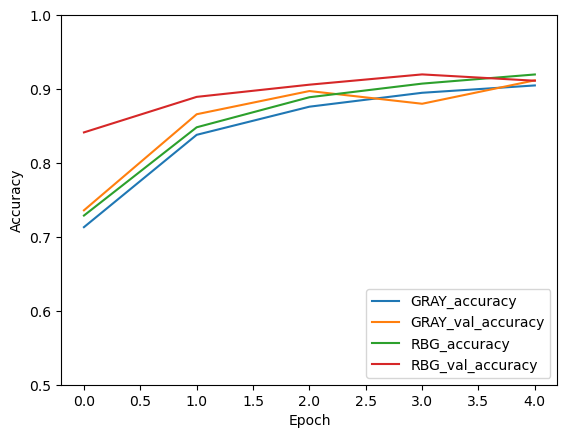

In [11]:
plt.plot(history_gray.history['accuracy'], label='GRAY_accuracy')
plt.plot(history_gray.history['val_accuracy'], label = 'GRAY_val_accuracy')
plt.plot(history_rgb.history['accuracy'], label='RBG_accuracy')
plt.plot(history_rgb.history['val_accuracy'], label = 'RBG_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_rgb_loss, test_rgb_acc = modelRGB.evaluate(DataCleaning.TEST_GENERATOR_RGB, verbose=2)
test_gray_loss, test_gray_acc = modelGRAY.evaluate(DataCleaning.TEST_GENERATOR_GRAY, verbose=2)

In [12]:
print(test_gray_acc)
print(test_rgb_acc)

0.9117500185966492
0.9112499952316284
